In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind, f_oneway

# Veri yükleme
data = pd.read_csv(r"C:\Users\90535\Desktop\Ali Murat\Makine Öğrenme\VERİ\supermarket_sales - Sheet1.csv")

# İlk 5 satırı görüntüleme
print(data.head())

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [8]:
# Tanımlayıcı istatistikler
desc_stats = data.describe()

# İstatistiklerin yazdırılması
print("Tanımlayıcı İstatistikler:")
print(desc_stats)

Tanımlayıcı İstatistikler:
        Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.

### Kategorik özelliklerin dağılımı

Şube Bazında Satış Dağılımı:
  Branch  Satış Sayısı
0      A           340
1      B           332
2      C           328


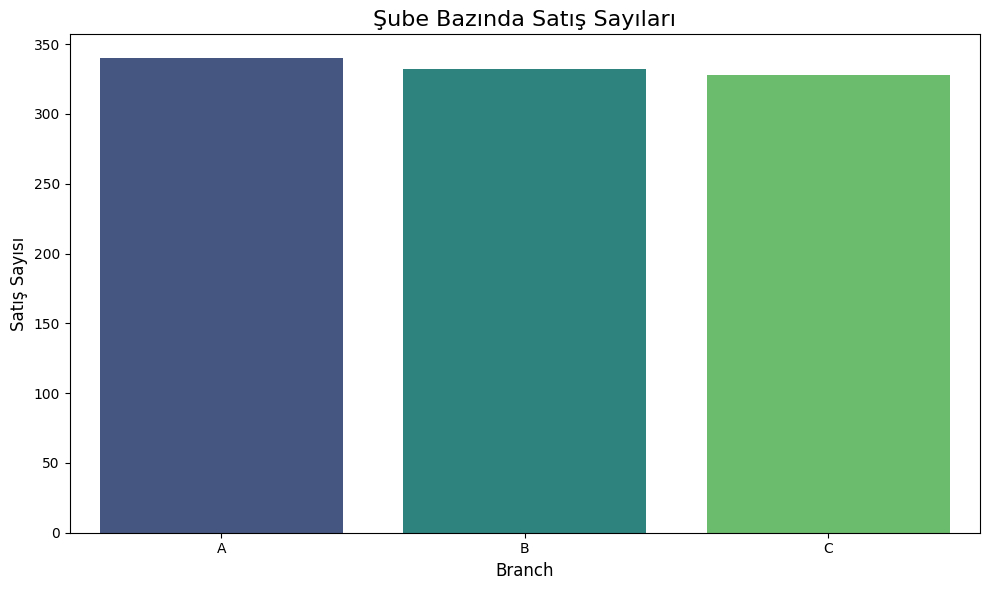

In [10]:
# Şube bazında satış sayıları
branch_distribution = data['Branch'].value_counts().reset_index()
branch_distribution.columns = ['Branch', 'Satış Sayısı']
print("Şube Bazında Satış Dağılımı:")
print(branch_distribution)

# Bar grafiği oluşturma
plt.figure(figsize=(10, 6))  # Grafik boyutunu ayarlama
sns.barplot(x='Branch', y='Satış Sayısı', data=branch_distribution, hue='Branch', palette='viridis')

# Başlık ve etiketler
plt.title('Şube Bazında Satış Sayıları', fontsize=16)
plt.xlabel('Branch', fontsize=12)
plt.ylabel('Satış Sayısı', fontsize=12)

# Grafiği gösterme
plt.tight_layout()  # Layout'u düzenleme
plt.show()

Müşteri Türü Bazında Dağılım:
  Customer type  Müşteri Sayısı
0        Member             501
1        Normal             499


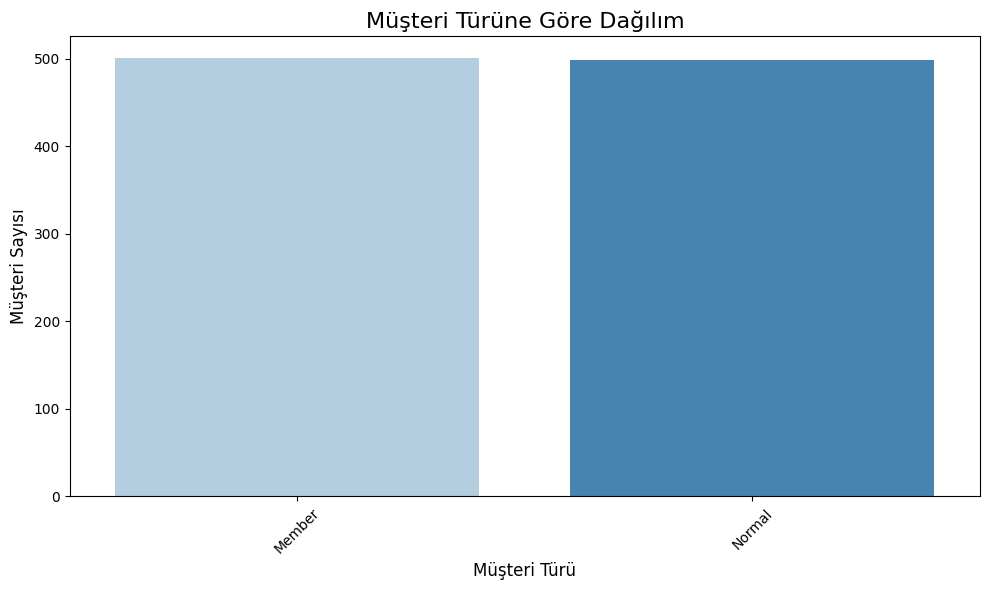

In [54]:
# Müşteri Türlerine Göre Dağılım
customer_type_distribution = data['Customer type'].value_counts().reset_index()
customer_type_distribution.columns = ['Customer type', 'Müşteri Sayısı']
print("Müşteri Türü Bazında Dağılım:")
print(customer_type_distribution)

# Bar grafiği oluşturma
plt.figure(figsize=(10, 6))
sns.barplot(x='Customer type', y='Müşteri Sayısı', data=customer_type_distribution, hue = 'Customer type' ,  palette='Blues')

# Başlık ve etiketler
plt.title('Müşteri Türüne Göre Dağılım', fontsize=16)
plt.xlabel('Müşteri Türü', fontsize=12)
plt.ylabel('Müşteri Sayısı', fontsize=12)

# Grafiği gösterme
plt.xticks(rotation=45)  # X eksenindeki etiketlerin okunabilirliği için döndürme
plt.tight_layout()  # Grafik öğelerinin düzgün yerleşmesini sağlama
plt.show()

Ürün Hatlarına Göre Toplam Satış:
             Product line  Toplam Satış
0  Electronic accessories    54337.5315
1     Fashion accessories    54305.8950
2      Food and beverages    56144.8440
3       Health and beauty    49193.7390
4      Home and lifestyle    53861.9130
5       Sports and travel    55122.8265


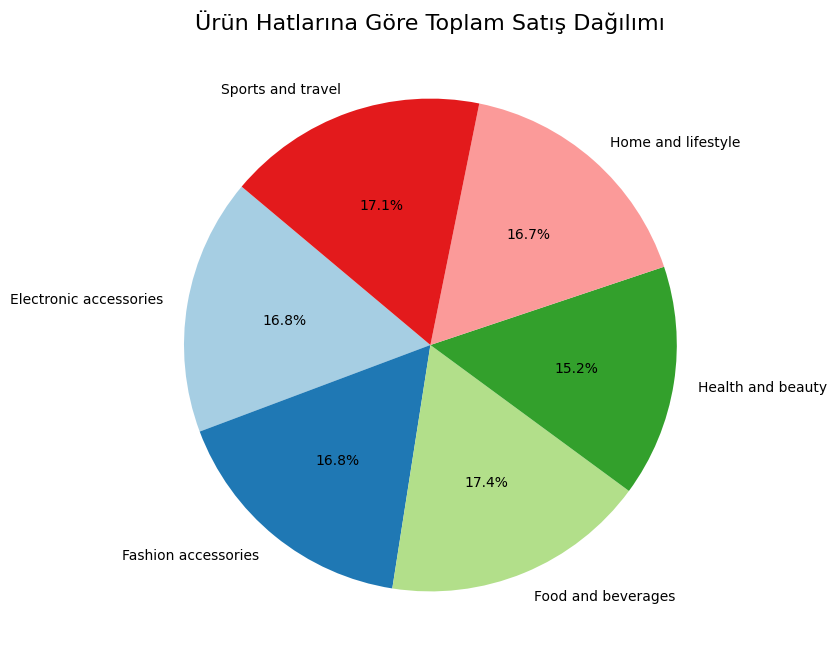

In [12]:
# Ürün hatlarına göre toplam satış
product_sales = data.groupby('Product line')['Total'].sum().reset_index()
product_sales.columns = ['Product line', 'Toplam Satış']
print("Ürün Hatlarına Göre Toplam Satış:")
print(product_sales)

# Pasta grafiği oluşturma
plt.figure(figsize=(8, 8))  # Grafik boyutunu ayarlama
plt.pie(product_sales['Toplam Satış'], labels=product_sales['Product line'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Başlık
plt.title('Ürün Hatlarına Göre Toplam Satış Dağılımı', fontsize=16)

# Grafiği gösterme
plt.show()

## İlişki Analizi

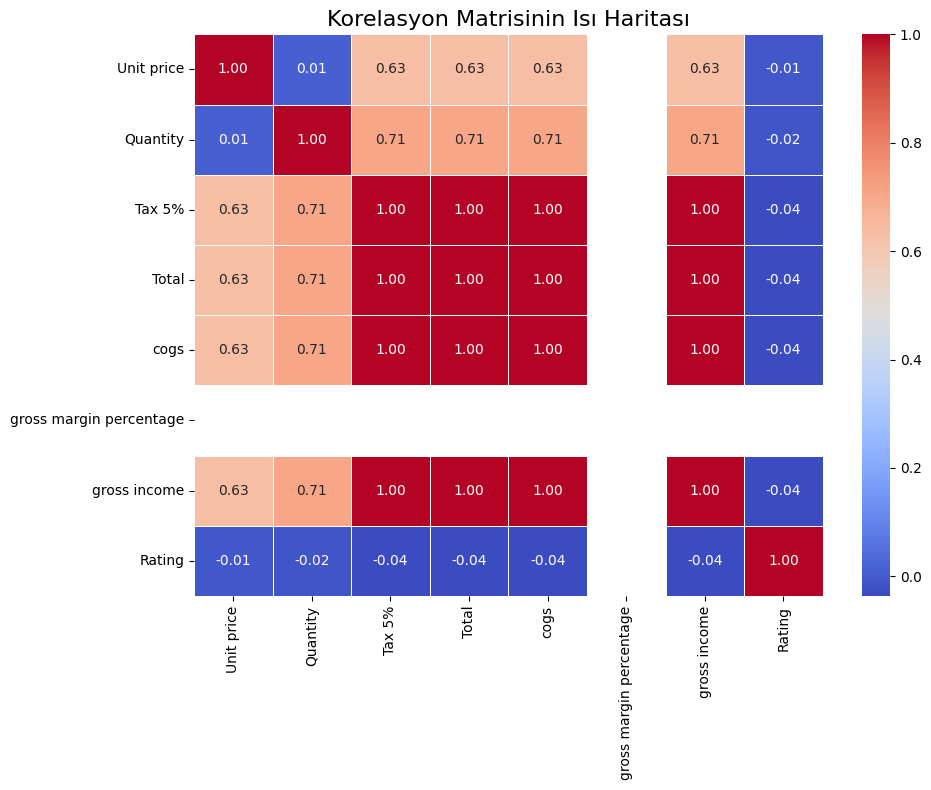

In [19]:
# Sadece Sayısal Değişkenlere Erişelim
numeric_df = data.select_dtypes(include=['float64', 'int64'])
# Korelasyon Matrisini Hesaplama
correlation_matrix = numeric_df.corr()
numeric_df.corr()

# Isı haritası oluşturma
plt.figure(figsize=(10, 8))  # Grafik boyutunu ayarlama
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# Başlık ve etiketler
plt.title('Korelasyon Matrisinin Isı Haritası', fontsize=16)
plt.tight_layout()

# Grafiği gösterme
plt.show()

## Zaman Serisi Analizi

Günlük Toplam Satışlar:
          Date  Günlük Toplam Satış
0   2019-01-01            4745.1810
1   2019-01-02            1945.5030
2   2019-01-03            2078.1285
3   2019-01-04            1623.6885
4   2019-01-05            3536.6835
..         ...                  ...
84  2019-03-26            1962.5130
85  2019-03-27            2902.8195
86  2019-03-28            2229.4020
87  2019-03-29            4023.2430
88  2019-03-30            4487.0595

[89 rows x 2 columns]


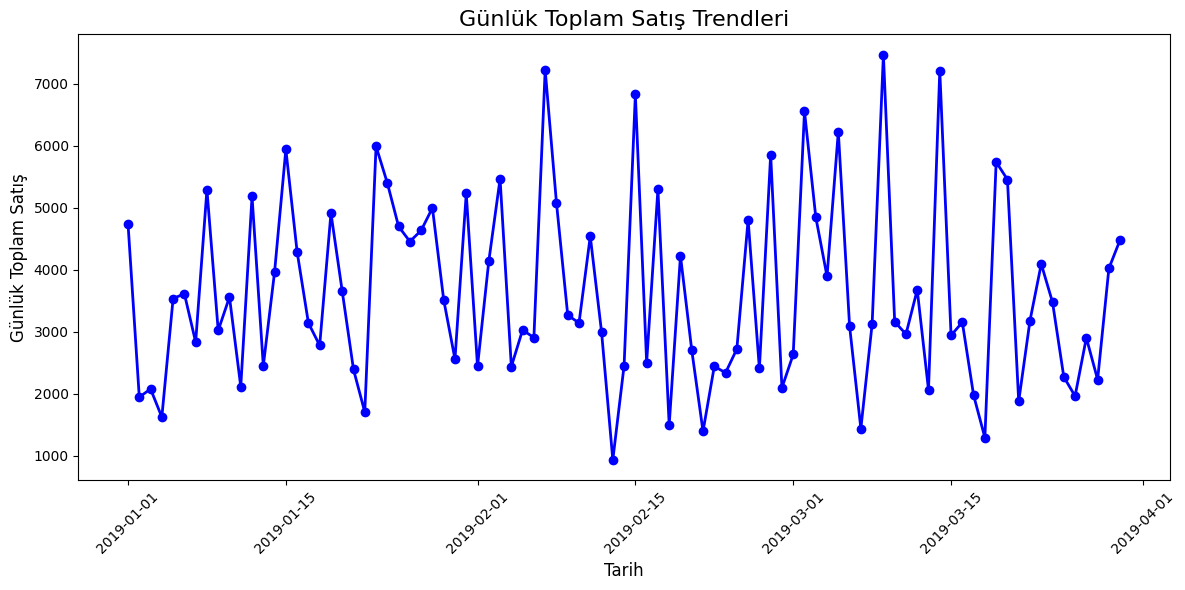

In [22]:
# Tarihi datetime formatına çevirme
data['Date'] = pd.to_datetime(data['Date'])

# Günlük toplam satış trendi
daily_sales = data.groupby(data['Date'].dt.date)['Total'].sum().reset_index()
daily_sales.columns = ['Date', 'Günlük Toplam Satış']
print("Günlük Toplam Satışlar:")
print(daily_sales)

# Çizgi grafiği oluşturma
plt.figure(figsize=(12, 6))  # Grafik boyutunu ayarlama
plt.plot(daily_sales['Date'], daily_sales['Günlük Toplam Satış'], marker='o', color='b', linestyle='-', linewidth=2)

# Başlık ve etiketler
plt.title('Günlük Toplam Satış Trendleri', fontsize=16)
plt.xlabel('Tarih', fontsize=12)
plt.ylabel('Günlük Toplam Satış', fontsize=12)

# X eksenindeki tarih etiketlerini döndürme
plt.xticks(rotation=45)

# Grafiği gösterme
plt.tight_layout()
plt.show()

## Müşteri Deneyimi Analizi

Derecelendirme ve Ortalama Brüt Gelir:
    Rating  Ortalama Brüt Gelir
0      4.0            17.257636
1      4.1            10.053735
2      4.2            20.077727
3      4.3            15.762194
4      4.4            18.813912
..     ...                  ...
56     9.6            15.664588
57     9.7            11.334679
58     9.8            12.473500
59     9.9            17.330156
60    10.0            19.812900

[61 rows x 2 columns]


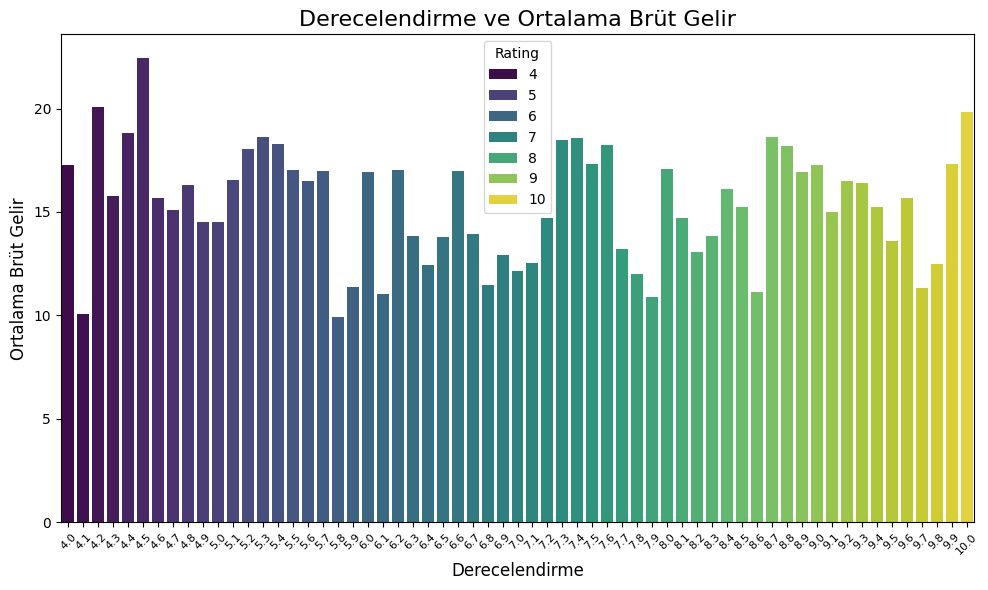

In [25]:
# Derecelendirme ve brüt gelir ortalamaları
rating_vs_revenue = data.groupby('Rating')['gross income'].mean().reset_index()
rating_vs_revenue.columns = ['Rating', 'Ortalama Brüt Gelir']
print("Derecelendirme ve Ortalama Brüt Gelir:")
print(rating_vs_revenue)

# Çubuk grafiği oluşturma
plt.figure(figsize=(10, 6))  # Grafik boyutunu ayarlama
sns.barplot(x='Rating', y='Ortalama Brüt Gelir', data=rating_vs_revenue, hue = 'Rating' , palette='viridis')

# Başlık ve etiketler
plt.title('Derecelendirme ve Ortalama Brüt Gelir', fontsize=16)
plt.xlabel('Derecelendirme', fontsize=12)
plt.ylabel('Ortalama Brüt Gelir', fontsize=12)

plt.xticks(rotation=45, fontsize=8) # Derecelendirme sayıları net görünmesi için

# Grafiği gösterme
plt.tight_layout()
plt.show()

Şube Bazında Ortalama Derecelendirmeler:
  Branch  Ortalama Derecelendirme
0      A                 7.027059
1      B                 6.818072
2      C                 7.072866


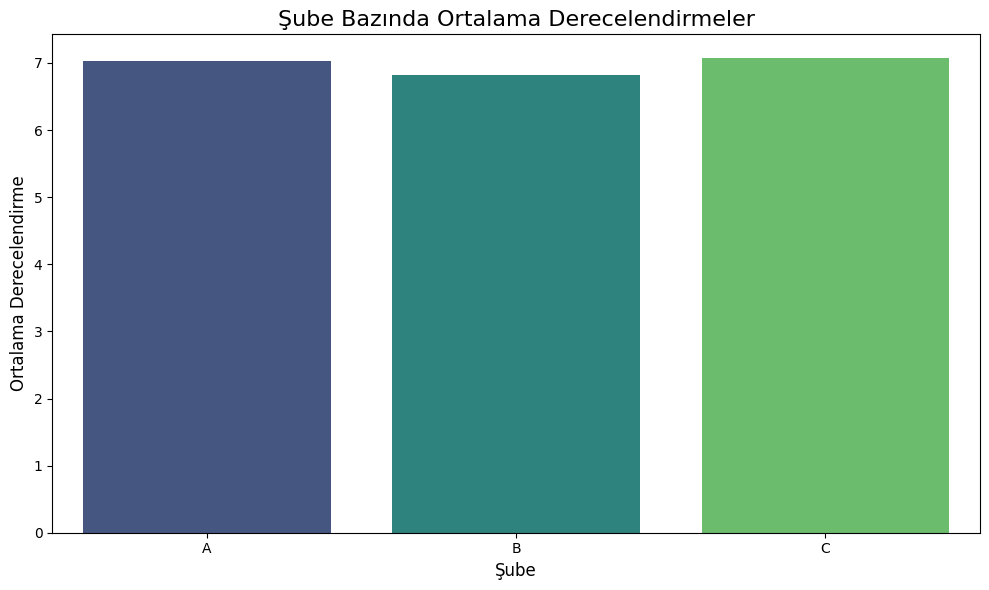

In [27]:
# Şube bazında derecelendirme ortalamaları
avg_rating = data.groupby('Branch')['Rating'].mean().reset_index()
avg_rating.columns = ['Branch', 'Ortalama Derecelendirme']
print("Şube Bazında Ortalama Derecelendirmeler:")
print(avg_rating)
# Çubuk grafiği oluşturma
plt.figure(figsize=(10, 6))  # Grafik boyutunu ayarlama
sns.barplot(x='Branch', y='Ortalama Derecelendirme', data=avg_rating, hue = 'Branch' , palette='viridis')

# Başlık ve etiketler
plt.title('Şube Bazında Ortalama Derecelendirmeler', fontsize=16)
plt.xlabel('Şube', fontsize=12)
plt.ylabel('Ortalama Derecelendirme', fontsize=12)

# Grafiği gösterme
plt.tight_layout()
plt.show()

## Kar Analizi


Şube Bazında Toplam Brüt Gelir:
  Branch  Toplam Brüt Gelir
0      A          5057.1605
1      B          5057.0320
2      C          5265.1765


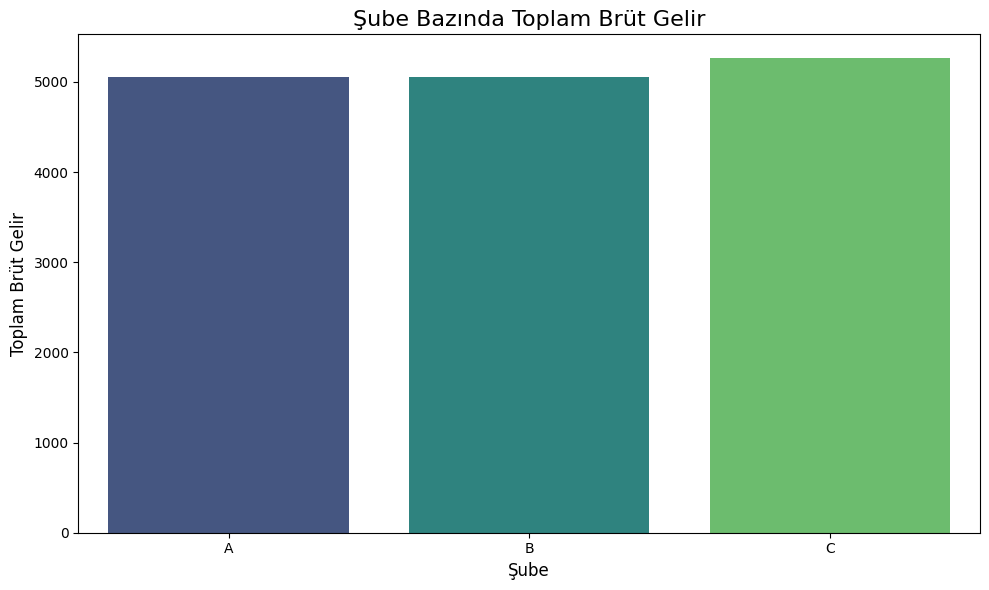

In [29]:
# Şube bazında brüt gelir analizi
branch_profit = data.groupby('Branch')['gross income'].sum().reset_index()
branch_profit.columns = ['Branch', 'Toplam Brüt Gelir']
print("Şube Bazında Toplam Brüt Gelir:")
print(branch_profit)

# Çubuk grafiği oluşturma
plt.figure(figsize=(10, 6))  # Grafik boyutunu ayarlama
sns.barplot(x='Branch', y='Toplam Brüt Gelir', data=branch_profit, hue = 'Branch' , palette='viridis')

# Başlık ve etiketler
plt.title('Şube Bazında Toplam Brüt Gelir', fontsize=16)
plt.xlabel('Şube', fontsize=12)
plt.ylabel('Toplam Brüt Gelir', fontsize=12)

# Grafiği gösterme
plt.tight_layout()
plt.show()

## Ödeme Yöntemi Analizi

Ödeme Yöntemlerine Göre Toplam Satış:
  Ödeme Yöntemi  Toplam Satış
0          Cash    112206.570
1   Credit card    100767.072
2       Ewallet    109993.107


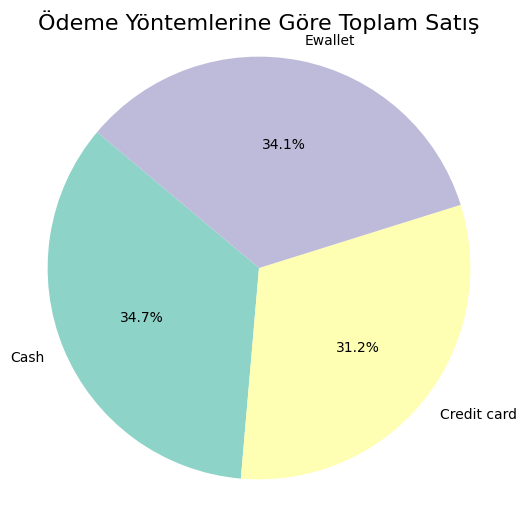

In [31]:
# Ödeme yöntemlerine göre toplam satış
payment_sales = data.groupby('Payment')['Total'].sum().reset_index()
payment_sales.columns = ['Ödeme Yöntemi', 'Toplam Satış']
print("Ödeme Yöntemlerine Göre Toplam Satış:")
print(payment_sales)

# Pasta grafiği oluşturma
plt.figure(figsize=(6, 6))  # Grafik boyutunu ayarlama
plt.pie(payment_sales['Toplam Satış'], labels=payment_sales['Ödeme Yöntemi'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3', len(payment_sales)))

# Başlık
plt.title('Ödeme Yöntemlerine Göre Toplam Satış', fontsize=16)

# Grafiği gösterme
plt.axis('equal')  # Daire şeklinde görünmesini sağlamak için
plt.show()

Ödeme Yöntemlerine Göre Müşteri Sayısı:
  Ödeme Yöntemi  Müşteri Sayısı
0       Ewallet             345
1          Cash             344
2   Credit card             311


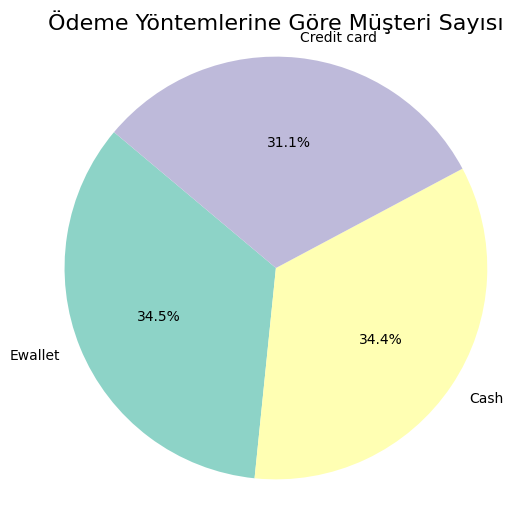

In [33]:
# Ödeme yöntemlerine göre müşteri sayısı
payment_count = data['Payment'].value_counts().reset_index()
payment_count.columns = ['Ödeme Yöntemi', 'Müşteri Sayısı']
print("Ödeme Yöntemlerine Göre Müşteri Sayısı:")
print(payment_count)

# Pasta grafiği oluşturma
plt.figure(figsize=(6, 6))  # Grafik boyutunu ayarlama
plt.pie(payment_count['Müşteri Sayısı'], labels=payment_count['Ödeme Yöntemi'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3', len(payment_count)))

# Başlık
plt.title('Ödeme Yöntemlerine Göre Müşteri Sayısı', fontsize=16)

# Grafiği gösterme
plt.axis('equal')  # Daire şeklinde görünmesini sağlamak için
plt.show()


## Regresyon Modelleri

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Veri ön işleme
X = data[['Quantity', 'Unit price']]  # Bağımsız değişkenler
y = data['Total']  # Bağımlı değişken

# Veriyi eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model oluşturma ve eğitme
model = LinearRegression()
model.fit(X_train, y_train)

# Tahmin
y_pred = model.predict(X_test)

# Model değerlendirme
r2 = r2_score(y_test, y_pred)  # R2 Skoru
mse = mean_squared_error(y_test, y_pred)  # Ortalama Kare Hata
mae = mean_absolute_error(y_test, y_pred)  # Ortalama Mutlak Hata

# Sonuçları DataFrame olarak yazdırma
model_results = pd.DataFrame({
    "R2 Skoru": [r2],
    "Ortalama Kare Hata": [mse],
    "Ortalama Mutlak Hata": [mae]
})

print("Model Değerlendirme Sonuçları:")
print(model_results)


Model Değerlendirme Sonuçları:
   R2 Skoru  Ortalama Kare Hata  Ortalama Mutlak Hata
0  0.904271         6228.045511             58.537047


## Segmentasyon (Kümeleme Analizi)

C:\Users\90535\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Müşteri Küme Sonuçları:
    Invoice ID  Cluster
0  750-67-8428        1
1  226-31-3081        2
2  631-41-3108        2
3  123-19-1176        1
4  373-73-7910        1

Küme Dağılımı:
   Cluster  Müşteri Sayısı
0        2             375
1        0             314
2        1             311


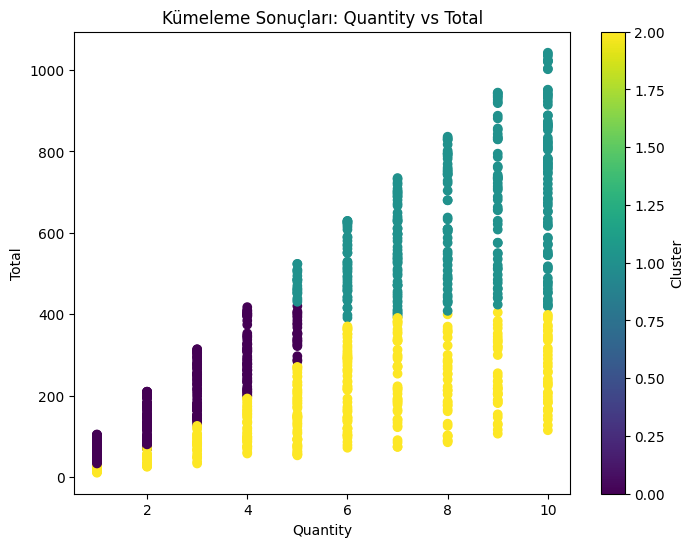

In [41]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Öznitelik seçimi (sadece sayısal özellikler)
features = data[['Quantity', 'Unit price', 'Total']]

# Verilerin standartlaştırılması
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# K-means kümeleme işlemi (3 küme ile)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(features_scaled)

# Küme sonuçlarını tablo halinde hazırlama
cluster_table = data[['Invoice ID', 'Cluster']]

# Küme dağılımını inceleyelim
cluster_counts = data['Cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Müşteri Sayısı']

# Sonuçları yazdırma
print("Müşteri Küme Sonuçları:")
print(cluster_table.head())  # İlk 5 satırı yazdırma

print("\nKüme Dağılımı:")
print(cluster_counts)  # Küme sayıları ve müşteri dağılımı

# Küme merkezlerini görselleştirme
plt.figure(figsize=(8, 6))
plt.scatter(data['Quantity'], data['Total'], c=data['Cluster'], cmap='viridis')
plt.title('Kümeleme Sonuçları: Quantity vs Total')
plt.xlabel('Quantity')
plt.ylabel('Total')
plt.colorbar(label='Cluster')
plt.show()


## A/B/C Şubeleri Arası Varyans Analizi (ANOVA)

A/B/C Şubeleri Arası ANOVA Sonuçları:
   Test İstatistiği  P-Değeri
0          0.884583   0.41321

İstatistiksel olarak anlamlı fark bulunmamaktadır (p >= 0.05).


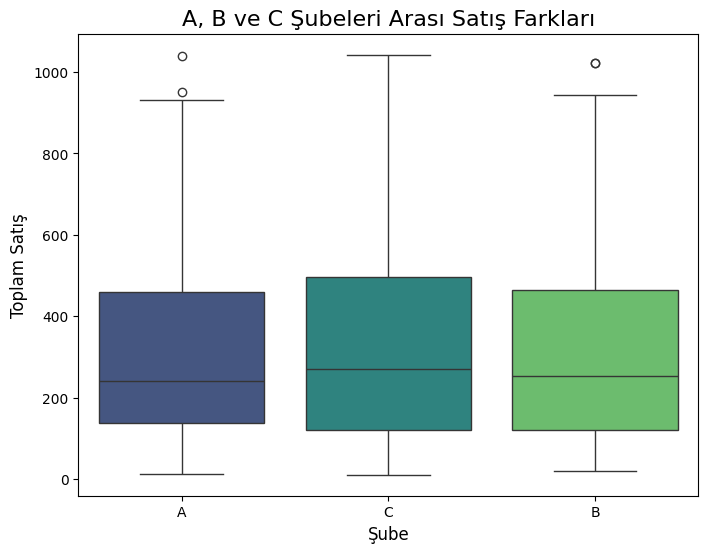

In [43]:
import pandas as pd
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

# A, B, C grupları için satışları ayırma
group_A = data[data['Branch'] == 'A']['Total']
group_B = data[data['Branch'] == 'B']['Total']
group_C = data[data['Branch'] == 'C']['Total']

# Tek yönlü ANOVA testi
stat, p_value = f_oneway(group_A, group_B, group_C)

# Sonuçları tablo şeklinde gösterme
anova_results = pd.DataFrame({
    "Test İstatistiği": [stat],
    "P-Değeri": [p_value]
})
print("A/B/C Şubeleri Arası ANOVA Sonuçları:")
print(anova_results)

# Sonuçların yorumlanması
if p_value < 0.05:
    print("\nİstatistiksel olarak anlamlı fark bulunmaktadır (p < 0.05).")
else:
    print("\nİstatistiksel olarak anlamlı fark bulunmamaktadır (p >= 0.05).")

# Gruplar arasındaki satış farklarını görselleştirme
plt.figure(figsize=(8, 6))
sns.boxplot(x='Branch', y='Total', data=data, hue = 'Branch' , palette='viridis')
plt.title('A, B ve C Şubeleri Arası Satış Farkları', fontsize=16)
plt.xlabel('Şube', fontsize=12)
plt.ylabel('Toplam Satış', fontsize=12)
plt.show()
